# Выявление закономерностей успешности интернет игр

__Материал для анализа:__ 

Анализируем данные о продажах игр, оценки пользователей и экспертов, жанры и платформы интернет-магазина "Стримчик" за 2016 год. Данные взяты из открытых источников. 

__Цель:__

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

__План работы:__

1. __Подготовка данных__:

     - Импорт нужных библиотек, импорт данных
     - Описание данных и предварительный анализ
     - Привдение к нижнему регистру)
     - Преобразование типов данных 
     - Выявление и обработка пропусков 
     - Посчитать суммарные продажи во всех регионах
     
2. __Исследовательский анализ данных:__

     - Ищем колличество игр в разные годы
     - Ищем платформы с наибольшими суммарными продажами
     - Смотрим распредление продаж по годам
     - Выбираем ТОП 5 платформ
     - Смотрим распределение продаж в зависимости от жанра игры
   
3. __Составить портрет пользователя каждого региона:__

     - Определяем портрет пользователя региона Северная Америка
     - Определяем портрет пользователя региона Европпа
     - Определяем портрет пользователя региона Япония
     - Определяем влияение рейтинга ESRB на продажи в каждом регионе
     
4. __Проверить гипотезы__ 

5. __Написать общий вывод__

## Подготовка данных

### Импорт нужных библиотек и данных

In [1]:
# отключаем предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# импорт необходимых в работе библиотек

import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import scipy.stats as stats

In [2]:
# импортируем данные
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Описание данных

__Описание данных__:

__Name__ — название игры

__Platform__ — для какой консоли игра выпускалась

__Year__ — Год выпуска

__Genre__ —  Жанр игры

__Publisher__ — компания-издатель

__NA_sales__ — продажи в Северной Америке (миллионы проданных копий)

__EU_sales__ — продажи в Европе (миллионы проданных копий)

__JP_sales__ — продажи в Японии (миллионы проданных копий)

__Other_sales__ — продажи в других странах (миллионы проданных копий)

__Critic_Score__ — оценка пользователей (максимум 100)

__User_Score__ — оценка пользователей платформы (максимум 10)

__Rating__ — рейтинг [ESRB]. Рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [3]:
# предварительный анализ
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Приведение столбцов к нижнему регистру

In [4]:
# Приведение названий столбцов к нижнему регистру
data.columns = data.columns.str.lower()

### Преобразование типов данных

In [5]:
# преобразование данных в нужные типы. Описать в каких столбцах заменили тип данных и почему
data.dtypes 

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [6]:
# меняем тип данных

data.user_score = data.user_score.replace('tbd', np.NaN) # пропуски'tbd' меняем на nаn для дальнейшего преобразования типа
data = data.astype({'year_of_release': 'Int64', 'user_score': 'float64'})

Меняем тип данных в столбце year_of_release для корректного отражения поля год. Столбец user_score приводим в сооответствие со столбцом critic_score для дальнейшего попарного анализа. 

### Выявление и обработка пропусков в данных

In [7]:
# выявление суммы пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [8]:
# Выводим сумму пропущенных значений
print('Всего пропущенных значений:', data.isna().sum().sum())

Всего пропущенных значений: 24742


In [9]:
# Ищем процент пропущенных значений по каждому столбцу
percent = (data.isnull().sum() * 100 / len(data)).round(1)
percent

name                0.0
platform            0.0
year_of_release     1.6
genre               0.0
na_sales            0.0
eu_sales            0.0
jp_sales            0.0
other_sales         0.0
critic_score       51.3
user_score         54.6
rating             40.5
dtype: float64

In [10]:
data.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.545917
rating             0.404786
dtype: float64

Обработаем столбцы с процентом пропусков более 10% - critic_score, user_score, rating. 

In [11]:
# смотрим зависимость показателей друг от друга в таблице перед тем как обрабатывать пропуски
data.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,-0.092500,0.003978,-0.168366,0.037820,0.011411,-0.267851
na_sales,-0.092500,1.000000,0.765335,0.449594,0.638649,0.240755,0.086200
eu_sales,0.003978,0.765335,1.000000,0.435061,0.722792,0.220752,0.055337
jp_sales,-0.168366,0.449594,0.435061,1.000000,0.291089,0.152593,0.125598
other_sales,0.037820,0.638649,0.722792,0.291089,1.000000,0.198554,0.057119
critic_score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000,0.580878
user_score,-0.267851,0.086200,0.055337,0.125598,0.057119,0.580878,1.000000


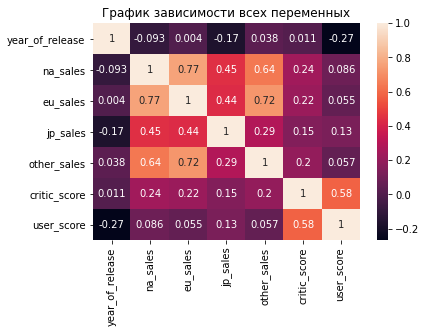

In [12]:
sns.heatmap(data.corr(), annot=True).set_title("График зависимости всех переменных")
plt.show()

Не вижу сильной зависимости между столбцами. 

In [13]:
# заполняем проупуски

data.critic_score = data.critic_score.fillna(-1) # пропуски в столбце меняем на -1, чтобы увидить их долю. Замена на медиану 
#или 0 может повлиять на исследования с участием этих показателей
data.user_score = data.user_score.fillna(-1) # пропуски в столбце меняем на -1
data = data.dropna(subset=('year_of_release', 'name'))
data.rating = data.rating.replace(np.NaN,'-1')

# проверяем колличество пропусков после обработки
print('Всего пропущенных значений:', data.isna().sum().sum())

Всего пропущенных значений: 0


In [14]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,-1
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,-1
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,-1


Пропуски в столбцах critic_score и critic_score заменил на -1. Замена пропусков на 0 или медиану может исказить исследование с применением этих столбцов. Данные с "-1" покажут колличество пропусков на графике. Пропуски в столбцах year_of_release и name удалил, так как пропуски в этих столбцах менее 1%. Пропуски в столбце rating временно заменил на "-1". 

Пропуск tbd в столбце user_score заменил в 6 ячейке для возможного преобразования типа. tbd по одной из версий расшифровывается как "рейтинг еще не известен". Применил сокращение для пропусков в столце rating.

### Считаю суммарные продажи во всех регионах

In [15]:
# Создаем новый столбец all_sales и считаем сумму по трем столбцам
data['all_sales'] = data[['eu_sales', 'jp_sales', 'na_sales','other_sales']].sum(axis=1)
data['all_sales'].sort_values(ascending = False).head(5)

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: all_sales, dtype: float64

In [16]:
# Ищем соотношение продаж в разных регионах в абсолютном выражении
data[['eu_sales', 'jp_sales', 'na_sales','other_sales']].sum().round(1)

eu_sales       2399.7
jp_sales       1290.6
na_sales       4341.4
other_sales     782.6
dtype: float64

In [17]:
# Ищем соотношение продаж в разных регионах
percent_region = (data[['eu_sales', 'jp_sales', 'na_sales','other_sales']].sum() * 100 / 
                  data['all_sales'].sum()).round(1)
percent_region.sort_values(ascending = False)

na_sales       49.3
eu_sales       27.2
jp_sales       14.6
other_sales     8.9
dtype: float64

Рынок Европпы и Америки примерно равен по обьему продаж. Тройку замыкает Япония с обьемом почти втрое меньше, чем у лидеров Европпы и Америки, но больше чем у остального мирового рынка.

## Исследовательский анализ данных

### Ищем кол-во игр в разные годы 

In [18]:
# Ищем колличество игр в разные годы
data.count_name_in_year = data.groupby('year_of_release')['name'].count()
data.count_name_in_year.sort_values(ascending = False).head(20)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
Name: name, dtype: int64

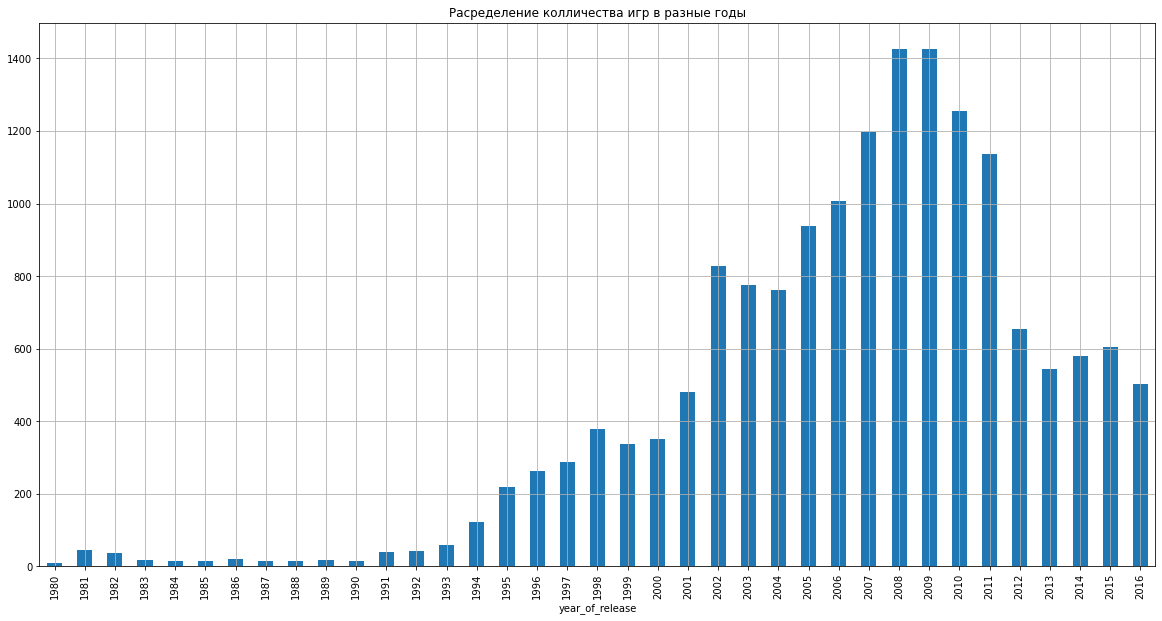

In [19]:
# Строим график распределения колличества игр в разные годы
data.count_name_in_year.plot(y='count_name_in_year', kind='bar', figsize = (20,10),grid=True, 
                             title='Расределение колличества игр в разные годы')
plt.show()

Больше всего игр выпусколось в период 2007-2011 гг. Начиная с 2012 года колличество игр сократилось почти в двое. Возможно это связано с усложнением игр и соответственным удорожанием. Так как нам известно лишь колличество игр, но не их цена, то предположу, что с сокращением колличества и работой над качеством, игровая индустрия не стала меньше зарабатывать.  

### Ищем платформы с наибольшими суммарными продажами

In [20]:
# Ищем топ продаж по разным платформам
top_platform_sales = pd.pivot_table(data, index= 'platform', values ='all_sales', aggfunc ='sum')
top_platform_sales.sort_values(by= 'all_sales', ascending = False).head(5)

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


In [21]:
# выбираем топ10 платформ с колличеством продаж более 245 млн.копий
top_platform_sales = top_platform_sales.query('all_sales > 245')
top_platform_sales.sort_values(by= 'all_sales', ascending = False)

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


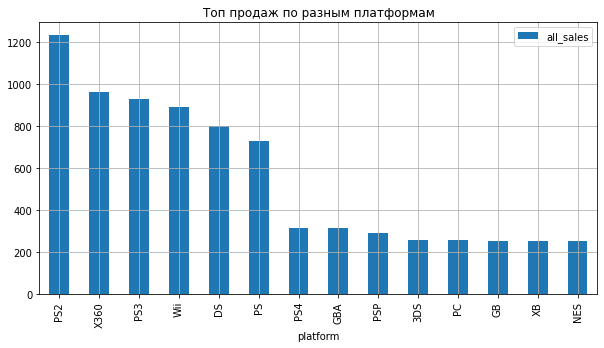

In [22]:
# Строим график распределения продаж по разным платформам из ТОП10
top_platform_sales.sort_values(by= 'all_sales', ascending = False).plot(y='all_sales', kind='bar', 
     figsize = (10,5),grid=True, title='Топ продаж по разным платформам')
plt.show()

В топ 5 продаж входят платформы PS2, X360, Wii, PS3, DS, PS с оборотом более 700 млн.копий каждый. Ближайшие к ним продавали почти вдвое меньше или менее 305 млн.копий. 

### Смотрим распределение продаж по годам

In [23]:
# найдем распредление топ продаж платформ по годам

top_platform_sales_years = pd.pivot_table(data, index= ['platform', 'year_of_release'], 
                                          values ='all_sales', aggfunc ='sum')
top_platform_sales_years.sort_values(by= 'all_sales', ascending = False).head(20)


all_sales
platform year_of_release           
PS2      2004                211.81
Wii      2009                206.97
PS2      2002                205.38
         2003                184.31
Wii      2008                171.32
X360     2010                170.03
PS       1998                169.49
PS2      2001                166.43
         2005                160.66
PS3      2011                156.78
Wii      2007                152.77
DS       2007                146.94
         2008                145.31
PS       1999                144.53
X360     2011                143.84
PS3      2010                142.17
Wii      2006                137.15
PS       1997                136.17
X360     2008                135.26
PS3      2009                130.93

In [24]:
# Возьмем топ продаж с 1998 года с оборотом более 100 млн.копий в год.
top_platform_sales_years1 = top_platform_sales_years.query('year_of_release >= 1998')
top_platform_sales_years1 = top_platform_sales_years.query('all_sales >= 100')

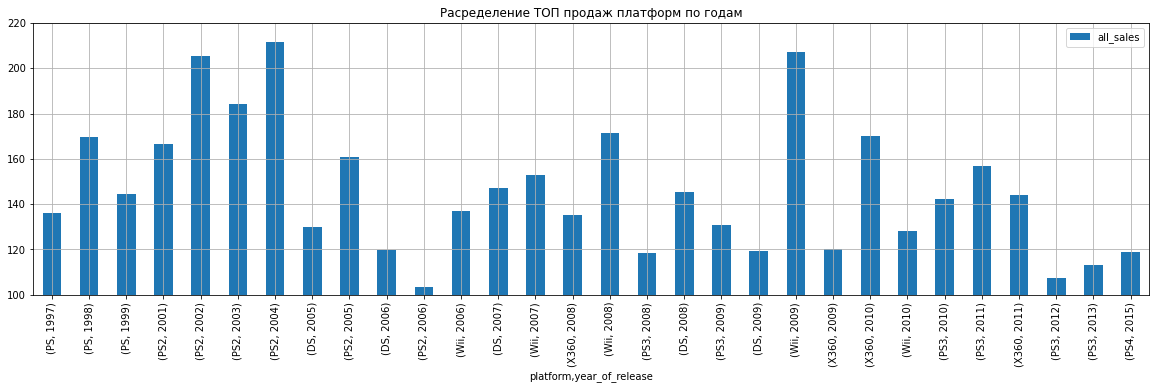

In [25]:
top_platform_sales_years1.sort_values(by= 'year_of_release', ascending = True).plot(y='all_sales', 
    kind='bar', ylim = (100,220), figsize = (20,5),grid=True, title='Расределение ТОП продаж платформ по годам')
plt.show()

Нельзя сказать, что есть четкая закономерность взлета и упадка какой-либо платформы. Усредненно можно сказать, что большинство платформ во второй и третий год делали максимум продаж с постепенным упадком в течении последующих 2 лет. Учитывая эту закономерность, платформа PS, PS2, PS3, PS4 сохраняя имя и оценки пользователей начала выпускать новые версии приставки каждые 3-4 года.

### Выбираем временной период и топ 5 для более корретного прогноза продаж на 2017 г.

In [26]:
# Возьмем в качестве актуального периода для прогноза продаж в 2017 г. период 2014-2016 гг. и топ 5 платформ по продажам

top_platform_sales_years = top_platform_sales_years.query('year_of_release >= 2014')
top_platform_sales_years = top_platform_sales_years.query('all_sales >= 30')

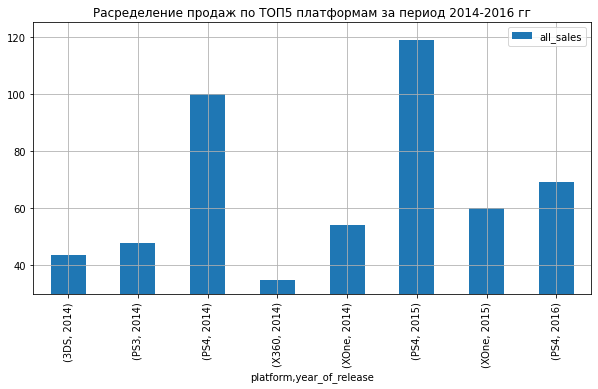

In [27]:
#Строим гистрограмму распеределения продаж по ТОП5 платформам за период 2014-2016 гг 

top_platform_sales_years.sort_values(by= 'year_of_release', ascending = True).plot(y='all_sales', 
    kind='bar', ylim = (30,125), figsize = (10,5),grid=True, 
    title='Расределение продаж по ТОП5 платформам за период 2014-2016 гг')
plt.show()

ТОП 5 прибыльных платформ PS4,XOne,3DS,PS3 и X360 с суммарнымип продажами более 30 млн.копий в год. Абсолютное лидерство за PS4 не смотря на падение продаж в 2016 г.

In [28]:
top5_platform = data.query("(platform in ['3DS','XOne','PS4','PS3','X360'])& (year_of_release >= 2014)")
top5_platform.head()
                                                                             

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,-1,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,-1,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,-1,7.98


### Смотрим распределение продаж по платформам и выявляем связь между продажами и оценками критиков и пользователей

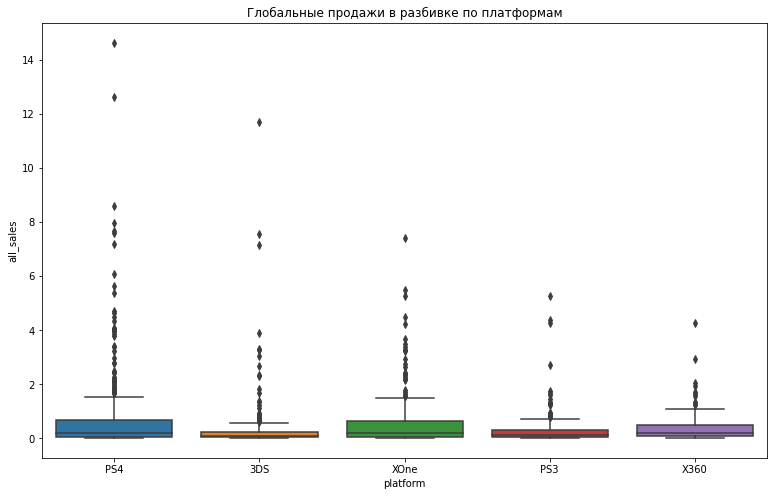

In [29]:
# построим общую диаграмму размаха
plt.figure(figsize=(13,8))
sns.boxplot(data = top5_platform, y='all_sales', x='platform').\
set_title("Глобальные продажи в разбивке по платформам")
plt.show()

In [30]:
# Проверяем наличие аномалий
top5_platform.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000
mean,2014.965969,0.220654,0.203700,0.061850,0.064921,30.952007,3.227312,0.551126
std,0.800476,0.511491,0.547368,0.244133,0.167507,36.999544,3.922101,1.215718
min,2014.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.050000
50%,2015.000000,0.040000,0.040000,0.000000,0.010000,-1.000000,4.300000,0.140000
75%,2016.000000,0.190000,0.160000,0.050000,0.050000,71.000000,7.100000,0.480000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.200000,14.630000


In [31]:
# Проверяем аномально большие продажи на платфоме PS4
top5_platform.loc[(top5_platform['platform'] == 'PS4')&(top5_platform['all_sales'] > 4)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,-1,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,-1,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39


Все в порядке. Показаны наиболее популярные игры и соответственно наибольшие продажи. 

In [32]:
# смотрим минимальные продажи игр на платформе PS4 
top5_platform.loc[(top5_platform['platform'] == 'PS4')&(top5_platform['all_sales'] <= 0.01)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
15734,Prototype: Biohazard Bundle,PS4,2016,Action,0.01,0.00,0.00,0.0,48.0,2.0,M,0.01
15762,Rabbids Invasion: The Interactive TV Show,PS4,2014,Misc,0.00,0.01,0.00,0.0,-1.0,-1.0,-1,0.01
15790,This War of Mine,PS4,2016,Action,0.00,0.01,0.00,0.0,-1.0,-1.0,-1,0.01
15839,Mark McMorris Infinite Air,PS4,2016,Sports,0.01,0.00,0.00,0.0,49.0,6.0,T,0.01
15864,Rocksmith 2014 Edition Remastered,PS4,2016,Misc,0.01,0.00,0.00,0.0,-1.0,7.8,T,0.01
15943,Professional Farmer 2016,PS4,2015,Action,0.00,0.01,0.00,0.0,-1.0,-1.0,-1,0.01
16076,King's Quest: The Complete Collection,PS4,2016,Adventure,0.01,0.00,0.00,0.0,-1.0,-1.0,E10+,0.01
16135,Super Stardust Ultra VR,PS4,2016,Shooter,0.00,0.01,0.00,0.0,66.0,6.2,E10+,0.01
16158,Raven's Cry,PS4,2015,Role-Playing,0.00,0.01,0.00,0.0,-1.0,-1.0,-1,0.01
16362,Crows: Burning Edge,PS4,2016,Action,0.00,0.00,0.01,0.0,-1.0,-1.0,-1,0.01


Аномалии на нижней границе тоже не подтвердились. 

In [33]:
# проверим наличие нулевых продаж
print('Колличество нулевых продаж =' , len(top5_platform[top5_platform['all_sales'] == 0]))

Колличество нулевых продаж = 0


По графику видно наличие выбросов. Выбросы связаны с разной популярностью игр и соответственно продаж. Топовые игры превышают порог 4 млн.копий, не популярные продают менее 1 млн.копий.

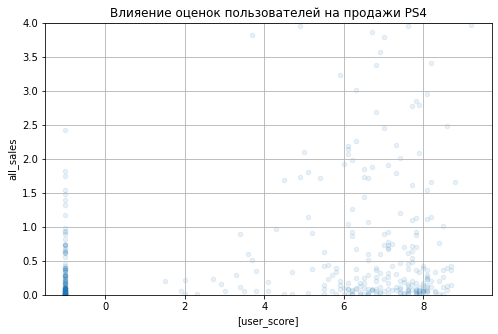

In [34]:
# Выявляем влияние оценок пользывателей на кол-во продаж на примере топовой платформы PS4
data[data['platform']=='PS4'].plot(x= ['user_score'] , y='all_sales', ylim= (0,4),
kind='scatter', alpha=0.1, figsize=(8,5), grid=True, title='Влияение оценок пользователей на продажи PS4')
plt.show()

Оценки пользователей судя по графику оказывают прямое влияение на продажи. Особенно это вилно на оценках в диапазоне 6-8. 
При этом видно что продаж без рейтинга, мы их обозначили как -1 тоже много! 

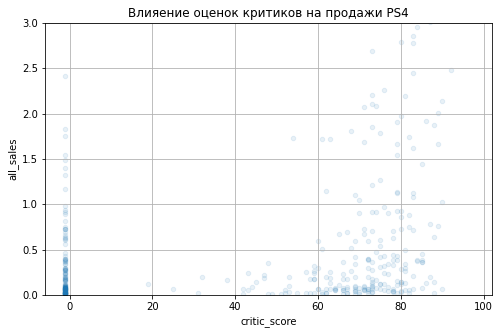

In [35]:
# Выявляем влияние оценок критиков на кол-во продаж на примере топовой платформы PS4
data[data['platform']=='PS4'].plot(x='critic_score', y='all_sales', ylim= (0,3), kind='scatter', alpha=0.1, 
figsize=(8,5), grid=True, title='Влияение оценок критиков на продажи PS4')
plt.show()

Оценки критиков также оказывают влияение на продажи. Особенно это вилно на оценках выше среднего от 60-90. При этом видно как продажи без рейтинга, мы их обозначили как -1 тоже много! 

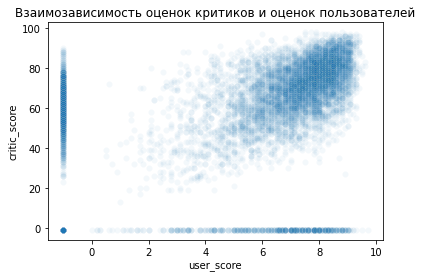

In [36]:
#Проверим влияют ли на друг друга оценки критиков и оценки пользователей 
sns.scatterplot(x='user_score', y='critic_score', data=data, alpha=0.05).\
set_title("Взаимозависимость оценок критиков и оценок пользователей")
plt.show()

In [37]:
top5_platform[['all_sales', 'critic_score', 'user_score']].corr()

,all_sales,critic_score,user_score
all_sales,1.000000,0.208153,0.129484
critic_score,0.208153,1.000000,0.772052
user_score,0.129484,0.772052,1.000000


Коэфиценты корреляции показывают слабую прямую зависимость между оценками критиков и обьемом продаж. Связь между оценками пользователей и оценками критиков сильная!

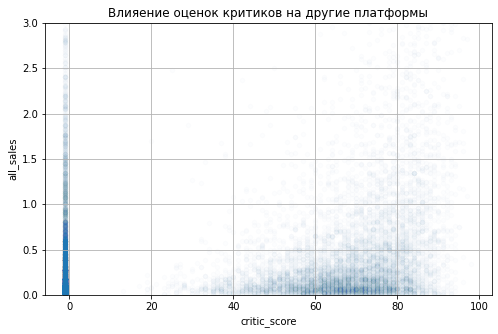

In [38]:
#Проверим зависимости оценок критиков на продажи на примере др топовой платформы
data[data['platform']!='PS4'].plot(x='critic_score', y='all_sales', ylim= (0,3), kind='scatter', 
               alpha=0.01, figsize=(8,5), grid=True, title='Влияение оценок критиков на другие платформы')
plt.show()

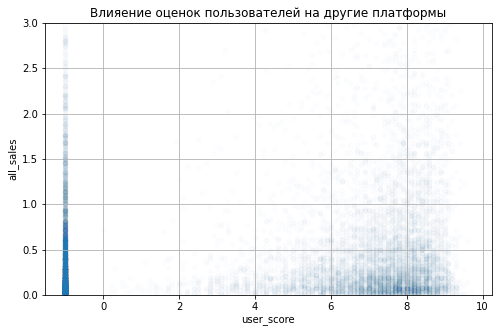

In [39]:
#Проверим зависимости оценок на продажи на примере др топовых платформ 
data[data['platform']!='PS4'].plot(x='user_score', y='all_sales', ylim= (0,3), kind='scatter', 
                alpha=0.01, figsize=(8,5), grid=True, title='Влияение оценок пользователей на другие платформы')
plt.show()

In [40]:
data_cor = data[data['platform']!='PS4'][['all_sales', 'critic_score', 'user_score']].corr()
data_cor

,all_sales,critic_score,user_score
all_sales,1.000000,0.144807,0.134210
critic_score,0.144807,1.000000,0.816877
user_score,0.134210,0.816877,1.000000


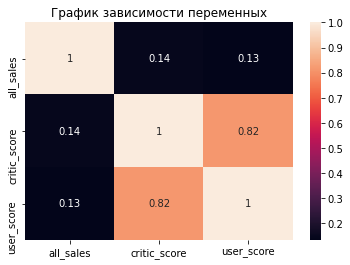

In [41]:
sns.heatmap(data_cor, annot=True).set_title("График зависимости переменных")
plt.show()

Вижу более четкую взаимосвязь между оценками и обьемом продаж на примере других платформ из ТОП5. При этом сохраняется прежний тренд - продажи растут при оценках пользователей выше среднего.

### Смотрим на распределение игр по жанрам

In [42]:
# Распределение суммарных продаж по жанрам
top5_platform_genre_sum = pd.pivot_table(top5_platform, index= 'genre', values ='all_sales', 
                                         aggfunc = 'sum')
top5_platform_genre_sum.sort_values(by= 'all_sales', ascending = False).head(10)


,all_sales
genre,
Action,175.17
Shooter,159.68
Sports,105.88
Role-Playing,88.95
Misc,26.32
Fighting,21.55
Racing,19.69
Adventure,14.47
Platform,10.97


In [43]:
# Распределение средних продаж по жанрам

top5_platform_genre_mean = pd.pivot_table(top5_platform, index= 'genre', values ='all_sales', 
                                         aggfunc ='mean')
top5_platform_genre_mean.sort_values(by= 'all_sales', ascending = False).head(11)

,all_sales
genre,
Shooter,1.550291
Sports,0.778529
Role-Playing,0.635357
Fighting,0.439796
Platform,0.421923
Action,0.415095
Racing,0.378654
Misc,0.350933
Simulation,0.282174


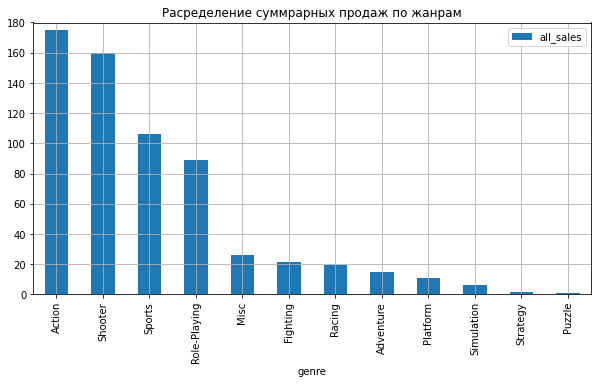

In [44]:
top5_platform_genre_sum.sort_values(by= 'all_sales', ascending = False).plot(y='all_sales', kind='bar', 
    ylim = (0,180), figsize = (10,5),grid=True, title='Расределение суммрарных продаж по жанрам')
plt.show()

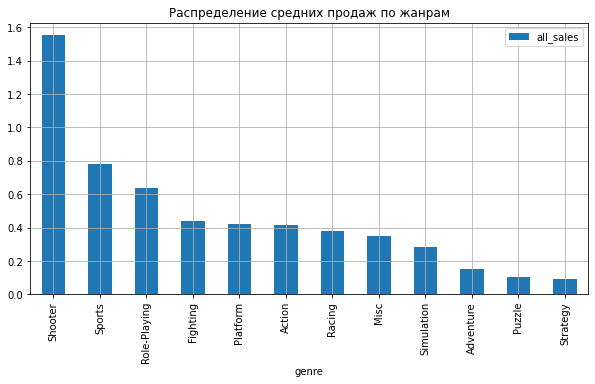

In [45]:
top5_platform_genre_mean.sort_values(by= 'all_sales', ascending = False).plot(y='all_sales', kind='bar', 
            figsize = (10,5),grid=True, title='Распределение средних продаж по жанрам')
plt.show()

Для анализа возьмем распредение средних значений продаж, так как они меньше подвержены выбросам. 
Наиболее популярные жанры игр - Shooter, Sports и Role-Playing с продажами более 600 тыс копий. Наименее популярные жанры  - Adventure и Puzzle	с продажами менее 150 тыс копий. 

## Составляем портрет пользователя каждого региона

### Определим портрет пользователя региона "Северная Америка"

In [46]:
# выделим для data выбранный для анализа отрезок времени
data = data.query('year_of_release >= 2014')

In [47]:
#Ищем ТОП продаж платформ в регионе "Северная Америка"
top5_platform_na_sales = pd.pivot_table(data, index= 'platform', values ='na_sales', aggfunc ='sum')
top5_platform_na_sales.sort_values(by= 'na_sales', ascending = False).head()

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


In [48]:
# Определим ТОП5 жанров в регионе "Северная Америка"
top5_na_genre_sales = pd.pivot_table(data, index= 'genre', values ='na_sales', aggfunc ='sum')
top5_na_genre_sales.sort_values(by= 'na_sales', ascending =False).head()

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


In [49]:
top5_na_sales = pd.pivot_table(data, index= ['genre','platform'], values ='na_sales', aggfunc ='sum')
top5_na_sales.sort_values(by= 'na_sales', ascending =False).head()

,,na_sales
genre,platform,
Shooter,XOne,33.73
Action,PS4,31.17
Shooter,PS4,28.64
Sports,PS4,17.50
Action,XOne,17.39


Вывод: Наиболее популярные платформы у пользователей Северной Америки - PS4 и XOne с продажами более 80 млн копий. Наиболее популярные жанры на этих платформах Shooter и  Action с продажами более 70 млн копий этих жанров.

### Определим портрет пользователя региона Европпа

In [50]:
#Ищем ТОП продаж платформ в регионе "Европпа"

top5_platform_eu_sales = pd.pivot_table(data, index= 'platform', values ='eu_sales', aggfunc ='sum')
top5_platform_eu_sales.sort_values(by= 'eu_sales', ascending = False).head(5)

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


In [51]:
# Определим ТОП5 жанров в регионе "Европпа"
top5_eu_genre_sales = pd.pivot_table(data, index= 'genre', values ='eu_sales', aggfunc ='sum')
top5_eu_genre_sales.sort_values(by= 'eu_sales', ascending =False).head()

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


In [52]:
top5_eu_sales = pd.pivot_table(data, index= ['genre','platform'], values ='eu_sales', aggfunc ='sum')
top5_eu_sales.sort_values(by= 'eu_sales', ascending =False).head()

,,eu_sales
genre,platform,
Action,PS4,40.64
Shooter,PS4,34.85
Sports,PS4,23.64
Shooter,XOne,16.45
Role-Playing,PS4,11.96


Вывод: На Европейском рынке портрет пользователя похож на портрет пользователя Северной Америки. 

### Определим портрет пользователя региона Япония

In [53]:
#Ищем ТОП продаж платформ в регионе "Япония"
top5_platform_jp_sales = pd.pivot_table(data, index= 'platform', values ='jp_sales', aggfunc ='sum')
top5_platform_jp_sales.sort_values(by= 'jp_sales', ascending = False).head()

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


In [54]:
# Определим ТОП5 жанров в регионе "Япония"
top5_jp_genre_sales = pd.pivot_table(data, index= 'genre', values ='jp_sales', aggfunc ='sum')
top5_jp_genre_sales.sort_values(by= 'jp_sales', ascending =False).head()

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


In [55]:
top5_jp_sales = pd.pivot_table(data, index= ['genre','platform'], values ='jp_sales', aggfunc ='sum')
top5_jp_sales.sort_values(by= 'jp_sales', ascending =False).head()

jp_sales
genre        platform          
Role-Playing 3DS          20.19
Action       3DS          13.25
             PS4           5.83
             PSV           4.90
Role-Playing PSV           4.69

Вывод: У пользователей Японии со значительным отрывом, почти в 3 раза, лидирует платформа 3DS и совсем не популярна платформа XOne. Наиболее популярным жанром игры является Role-Playing. 

In [56]:
# Смотрим соотношение продаж топовых платформ в разных регионах
top5_platform_sales = pd.pivot_table(data, index= 'platform', values =['na_sales','eu_sales',
     'jp_sales','other_sales'], aggfunc ='sum')
top5_platform_sales

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
3DS,16.12,44.24,22.64,3.68
PC,17.97,0.00,7.23,1.85
PS3,25.54,11.22,22.05,9.37
PS4,130.04,15.02,98.61,44.48
PSP,0.00,0.36,0.00,0.00
PSV,3.53,14.54,2.52,1.81
Wii,2.59,0.00,2.08,0.40
WiiU,13.15,7.31,19.36,3.16
X360,15.49,0.08,28.30,4.35


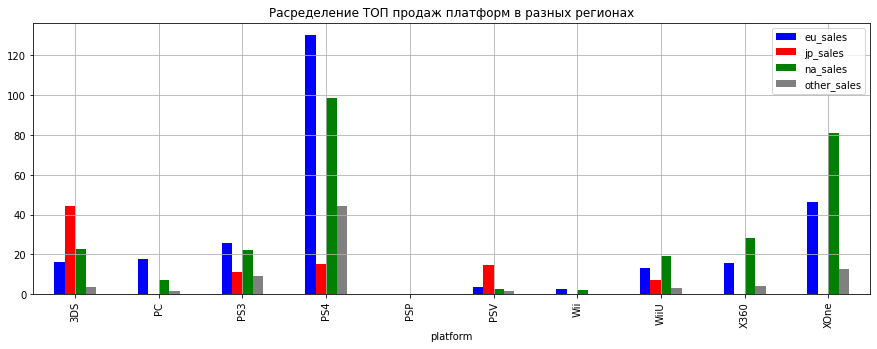

In [57]:
top5_platform_sales.plot(kind='bar', figsize = (15,5), color=['blue','red', 'green','grey'],
                         grid=True, title='Расределение ТОП продаж платформ в разных регионах')
plt.show()

Бесспорный лидер PS4 XOne 3DS. На графике видно, что топовая платформа PS4 и XOne получили минимальные продажи на японском рынке. При этом японский рынок видимо полюбил платформу 3DS отдав ей максимум продаж. 

In [58]:
# Определим ТОП5 жанров в разных регионах
top5_genre_sales = pd.pivot_table(data, index= 'genre', 
                                  values =['na_sales','eu_sales','jp_sales','other_sales'], aggfunc ='sum')
top5_genre_sales

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Action,74.68,29.58,72.53,22.57
Adventure,6.49,3.60,5.64,1.82
Fighting,6.69,6.37,12.43,2.73
Misc,12.86,5.61,15.05,4.03
Platform,6.80,2.69,6.79,1.81
Puzzle,0.52,0.93,0.65,0.11
Racing,14.13,1.76,8.74,2.89
Role-Playing,28.17,31.16,33.47,8.64
Shooter,65.52,4.87,79.02,21.53


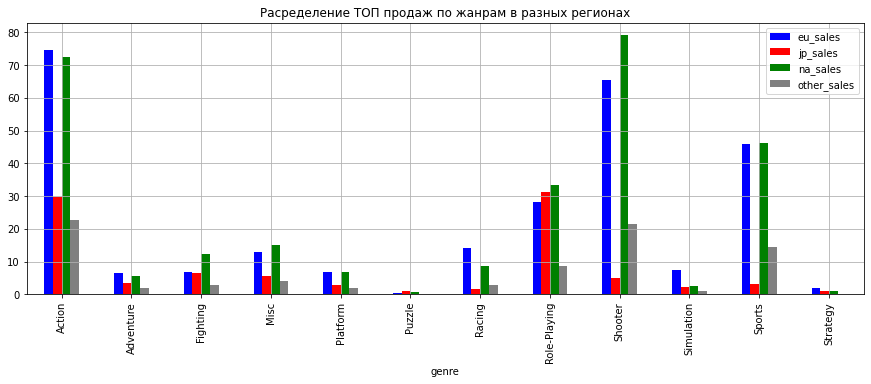

In [59]:
top5_genre_sales.plot(kind='bar', figsize = (15,5), color=['blue','red', 'green','grey'],grid=True, 
                      title='Расределение ТОП продаж по жанрам в разных регионах')
plt.show()

Видна плотная связь вкусов относительно жанров игр у Европейского и Американского рынков на примере жанров action, shooter, sports. На японском рынке самый популярный жанр Role-Playing.   

### Определяем влияение рейтинга ESRB  в каждом регионе 

__ESRB__ - рейтинг для компьютерных игр, показывающие рекомендованные возрастные ограничения. Категории рейтинга: 

__E__ - без ограничений

__E10+__ - для всех от 10 лет и старше

__T__ - подросткам от 13 лет

__M__ - для взрослых

__tbd__ - без рейтинга

In [60]:
# влияение рейтинга ESRB на продажи  в регионе "Северная Америка"
top5_sales_na_rating = pd.pivot_table(data, index= 'rating', values ='na_sales', aggfunc ='sum')
top5_sales_na_rating.sort_values(by= 'na_sales', ascending =False).head()

,na_sales
rating,
M,96.42
-1,64.72
E,50.74
T,38.95
E10+,33.23


В Северной Америке больше покупок из категории "для взрослых", почти вдовое меньше покупают игр без рейтинга и игры без ограничений. 

In [61]:
# влияение рейтинга ESRB на продажи в регионе "Европпа"

top5_sales_eu_rating = pd.pivot_table(data, index= 'rating', values ='eu_sales', aggfunc ='sum')
top5_sales_eu_rating.sort_values(by= 'eu_sales', ascending =False).head()

,eu_sales
rating,
M,93.44
-1,58.95
E,58.06
T,34.07
E10+,26.16


В Европпе также как в Америке больше покупок из категории "для взрослых", почти вдовое меньше покупают игр без рейтинга и игры без ограничений. 

In [62]:
# влияение рейтинга ESRB на продажи в в регионе "Япония"

top5_sales_jp_rating = pd.pivot_table(data, index= 'rating', values ='jp_sales', aggfunc ='sum')
top5_sales_jp_rating.sort_values(by= 'jp_sales', ascending =False).head()

,jp_sales
rating,
-1,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


В японии абсолютный лидер продаж - игры без рейтинга. Возможно на местном рынке используется другая возрастная градация. 

In [63]:
top5_sales_rating = pd.pivot_table(data, index= 'rating', values =['na_sales','eu_sales',
                                                                   'jp_sales'], aggfunc ='sum')
top5_sales_rating

,eu_sales,jp_sales,na_sales
rating,,,
-1,58.95,56.90,64.72
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95


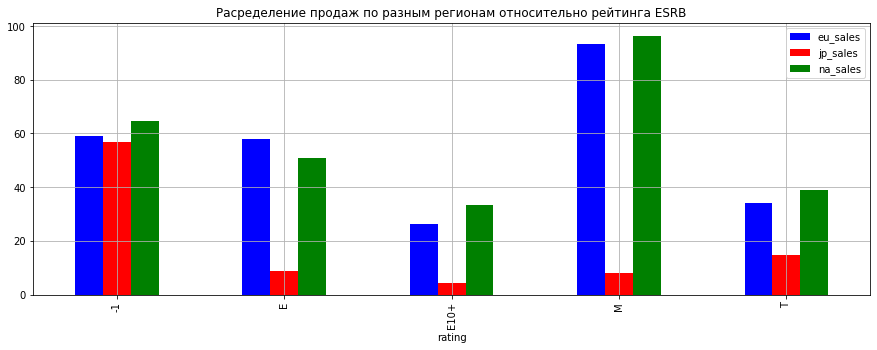

In [64]:
top5_sales_rating.plot(kind='bar', figsize = (15,5), color=['blue','red', 'green'],
                       grid=True, title='Расределение продаж по разным регионам относительно рейтинга ESRB')
plt.show()

Возрастной рейтинг влияет на продажи игр. Лидеры продаж игры возрастной категории "без ограничения" и "для взрослых". Игры для детей и подростков менее популярные. Взрослые меньше себя ограничивают в покупках игр в отличии от покупок игр для своих детей. Много проданных игр без рейтинга во всех регионах. Возможно это игры со спорным рейтингом, но они не менее популярные. 

## Проверяем гипотезы

### Первая гиппотеза - "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_a: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [65]:
# Подготовим выборки для проверки гиппотезы № 1

data_platform_xbox = data[data['platform'] == 'XOne']
data_platform_pc = data[data['platform'] == 'PC']

In [66]:
# критический уровень статистической значимости
alpha = 0.03 # Если pvalue будет меньше alpha, отвергаем нулевую гиппотезу

#Проверяем 1 гиппотезу
results = st.ttest_ind(data_platform_xbox['user_score'], data_platform_pc['user_score'],equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha: # условный оператор с выводом строки с ответом
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.26246011727057744
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC возможно одинаковые.

### Вторая гиппотеза - "Средние пользовательские рейтинги жанров Action и Sports разные"

H_0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

H_a: Средние пользовательские рейтинги жанров Action и Sports разные

<AxesSubplot:>

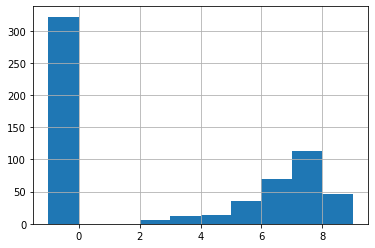

In [67]:
data[data['genre'] == 'Action']['user_score'].hist()

In [68]:
# Подготовим выборки для проверки гиппотезы № 2
data_genre_pc = data[data['genre'] == 'Action']
data_genre_xbox = data[data['genre'] == 'Sports']

In [69]:
# критический уровень статистической значимости
alpha = 0.03 # Если pvalue будет меньше alpha, отвергаем нулевую гиппотезу

#Проверяемn 2 гиппотезу
results = st.ttest_ind(data_genre_pc['user_score'], data_genre_xbox['user_score'],equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha: # условный оператор с выводом строки с ответом
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  4.829371809684136e-05
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports не одинаковые.

__Как сформулировал нулевую и альтернативную гипотезы?__

В качестве нулевой гиппотезы выбирал ту, у которой риск принятия неверного решения сводился к минимуму. 

__Какой критерий применил для проверки гипотез и почему?__

В качестве критерия для проверки гиппотез предположил, что выборки однородные и уровень критической значимости равен 0.03. 

## Вывод



Работа над проектом позволила выявить увидеть тенденции и особенности, определяющие успешность игр в разных регионах.
В ходе работы над проектом были выполнены следующие этапы: 

1. __Подготовка данных__:

На этапе подготовки данных были замечено значительное колличество пропусков в оценках пользователей, критиков и рейтинга игры - _более 50%_ Пропуски были обработаны и не повлияли на дальнейшее исследования. В ходе работы увидим влияние оценок и рейтинга на суммарные продажи. Будет полезным сделать поля с оценками более заметными для пользователей или др формат мотивации оставить оценку.
     
2. __Исследовательский анализ данных:__

    - Максимум продаж за историю исследования пришелся на период 2007-2011 гг. В топ 5 по обьему продаж за все время входят платформы PS2, X360, Wii, PS3, DS, PS с оборотом более 600 млн.копий каждый. Ближайшие к ним продавали почти вдвое меньше или менее 305 млн.копий. 

    - Начиная с 2012 года колличество игр сократилось почти в двое. Возможно это связано с усложнением игр и соответственным удорожанием. Так как нам известно лишь колличество игр, но не их цена, то предположу, что с сокращением колличества и работой над качеством, игровая индустрия не стала меньше зарабатывать. Для выбранного периода с 2014-2016 гг ТОП 5 прибыльных платформ - PS4,XOne,3DS,PS3 и X360 с суммарнымип продажами более 30 млн.копий в год. Абсолютное лидерство за PS4.

    - Не видно четкой временной закономерности взлета и упадка какой-либо платформы. Усредненно можно сказать, что большинство платформ во второй и третий год делали максимум продаж с постепенным упадком в течении последующих 2 лет. Учитывая эту закономерность, платформа PS, PS2, PS3, PS4 сохраняя имя и оценки пользователей начала выпускать новые версии приставки каждые 2-4 года.

    - Оценки пользователей и критиков оказывают прямое влияение на продажи. Особенно это видно на оценках в диапазоне 6-8 и 60-80 соответственно. При этом также видно что продаж без рейтинга, мы их обозначили как -1 тоже много!

    - Самые популярные игровые жанры - Shooter, Sports и Role-Playing с продажами более 600 тыс копий. Наименее популярные жанры  - Adventure и Puzzle	с продажами менее 150 тыс копий. 
  
3. __Составить портрет пользователя каждого региона:__

    - Америка:  Наиболее популярные платформы у пользователей Северной Америки - PS4 и XOne с продажами более 80 млн копий. Наиболее популярные жанры на этих платформах Shooter и  Action с продажами более 70 млн копий этих жанров. 

    - Европа: На Европейском рынке портрет пользователя похож на портрет пользователя Северной Америки.

    - Япония: У пользователей Японии со значительным отрывом, почти в 3 раза, лидирует платформа 3DS и совсем не популярна платформа XOne. Наиболее популярным жанром игры является Role-Playing.

    - Возрастной рейтинг влияет на продажи игр. Лидеры продаж игры возрастной категории "без ограничения" и "для взрослых". Игры для детей и подростков менее популярные. Взрослые меньше себя ограничивают в покупках игр в отличии от покупок игр для своих детей. Много проданных игр без рейтинга во всех регионах. Возможно это игры со спорным рейтингом, но они не менее популярные.
             
__Вывод и рекомендации:__

При планировании бюджета на запуск продуктов в сфере "компьютерные игры" стоит учесть:

    - цикл активности новой платформы в среднем 2-3 года. 
    - эффективнее выпускать релизы уже известной игры, нежели заводить абсолютно новые продукты
    - оценки критиков и пользователей влияют на продажи, но продаж продуктов без рейтинга тоже много
    - продажи пользователям Америки и Европпы : популярные платформы - PS4 и XOne, жанры - Shooter и  Action
    - продажи пользователям Японии : популярная платформа - 3DS, жанр - Role-Playing
    - наибольшие продажи в возрастных категориях: "без ограничения" и "для взрослых"

Учитывая более быстрое взросление детей, а также стремление взрослых создавать себе, альтернативную существующей, реальности, стоит обратить внимание на ключевые потребности основного потребителя старше 14 лет.